In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('datathon4.csv')

#Data Exploration

In [ ]:
print(data.head())

   encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0    

In [4]:
columns_to_keep = ['hospital_death', 'age', 'gender', 'bmi', 'aids', 'cirrhosis',
                    'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                    'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

data = data[columns_to_keep]

In [ ]:
description = data.describe()
description

,hospital_death,age,bmi,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,87485.000000,88284.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,0.086302,62.309516,29.185818,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,0.280811,16.775119,8.275142,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,0.000000,16.000000,14.844926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.930206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['hospital_death'].unique()

array([0, 1])

In [ ]:
data['age'].unique()

array([68., 77., 25., 81., 19., 67., 59., 70., 45., 50., 72., 80., 48.,
       65., 78., 30., 46., 39., 79., 58., 87., 60., 85., nan, 76., 53.,
       71., 82., 52., 75., 64., 55., 73., 88., 84., 62., 56., 38., 41.,
       35., 54., 74., 49., 86., 51., 63., 61., 47., 33., 89., 36., 69.,
       57., 22., 83., 66., 42., 27., 18., 17., 37., 43., 28., 40., 20.,
       32., 34., 23., 44., 24., 26., 31., 29., 21., 16.])

In [ ]:
data['bmi'].unique()

array([22.73      , 27.42      , 31.95      , ..., 33.81054776,
       45.93520298, 47.17967094])

In [ ]:
data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [11]:
# Replace 'F' with '0' and 'M' with '1' in the 'gender' column
data['gender'] = data['gender'].replace({'F': '0', 'M': '1'})

In [ ]:
data['gender'].unique()

array(['1', '0', nan], dtype=object)

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data.isnull().sum()
missing_value_counts

hospital_death                    0
age                            4228
gender                           25
bmi                            3429
aids                            715
cirrhosis                       715
diabetes_mellitus               715
hepatic_failure                 715
immunosuppression               715
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
dtype: int64

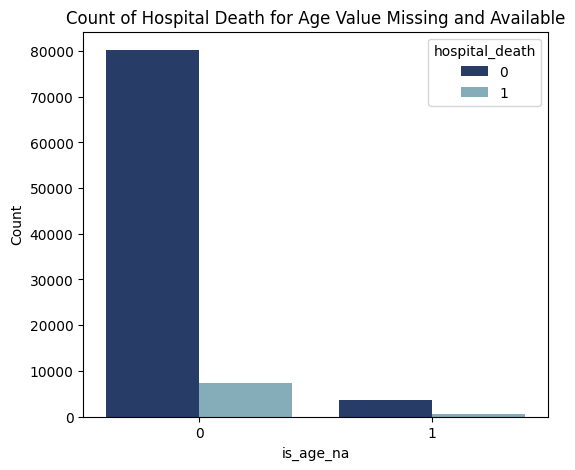

is_age_na
0    87485
1     4228
Name: hospital_death, dtype: int64


In [ ]:
#Investigate the presence of missing values in age column
# Create a binary indicator column 'is_age_na' to represent missing values in the 'age' column
data['is_age_na'] = data['age'].isna().astype(int)

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_age_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_age_na')
plt.ylabel('Count')
plt.title('Count of Hospital Death for Age Value Missing and Available')
plt.legend(title='hospital_death')
plt.show()

# Calculate the mean of 'hospital_death' grouped by 'is_age_na' and print the result
print(data.groupby('is_age_na')['hospital_death'].count())

# Remove the 'is_age_na' column from the DataFrame
data.drop('is_age_na', axis=1, inplace=True)

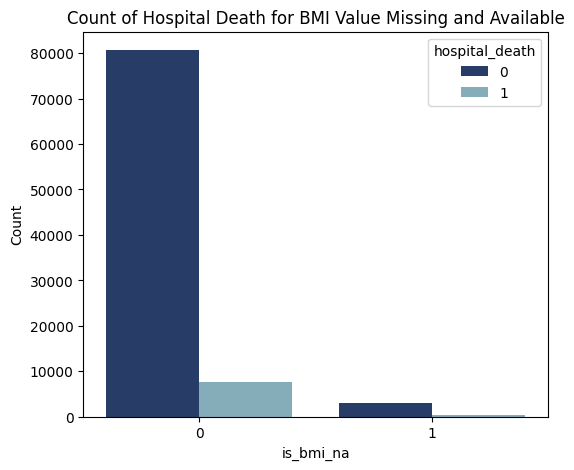

is_bmi_na
0    88284
1     3429
Name: hospital_death, dtype: int64


In [ ]:
#Investigate the presence of missing values in bmi column
# Create a binary indicator column 'is_bmi_na' to represent missing values in the 'bmi' column
data['is_bmi_na'] = data['bmi'].isna().astype(int)

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_bmi_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_bmi_na')
plt.ylabel('Count')
plt.title('Count of Hospital Death for BMI Value Missing and Available')
plt.legend(title='hospital_death')
plt.show()

# Calculate the mean of 'hospital_death' grouped by 'is_bmi_na' and print the result
print(data.groupby('is_bmi_na')['hospital_death'].count())

# Remove the 'is_age_na' column from the DataFrame
data.drop('is_bmi_na', axis=1, inplace=True)

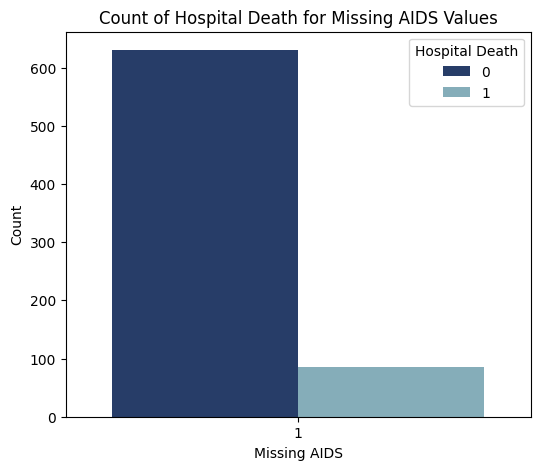

In [ ]:
# Create a binary indicator column 'is_aids_na' to represent missing values in the 'aids' column
data['is_aids_na'] = data['aids'].isna().astype(int)

# Filter the data to include only rows where 'aids' values are missing
missing_aids_data = data[data['is_aids_na'] == 1]

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=missing_aids_data, x='is_aids_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('Missing AIDS')
plt.ylabel('Count')
plt.title('Count of Hospital Death for Missing AIDS Values')
plt.legend(title='Hospital Death')
plt.show()

# Remove the 'is_aids_na' column from the DataFrame
data.drop('is_aids_na', axis=1, inplace=True)

In [ ]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (data.isnull().sum(axis=1) > 0).sum() / len(data)
percentage_missing_rows

0.0817114258611102

In [5]:
#drop the row containing null binary variable
data.dropna(subset=['gender'], inplace=True)
data.dropna(subset=['aids'], inplace=True)

In [6]:
missing_value_counts = data.isnull().sum()
missing_value_counts

hospital_death                    0
age                            3501
gender                            0
bmi                            3391
aids                              0
cirrhosis                         0
diabetes_mellitus                 0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
dtype: int64

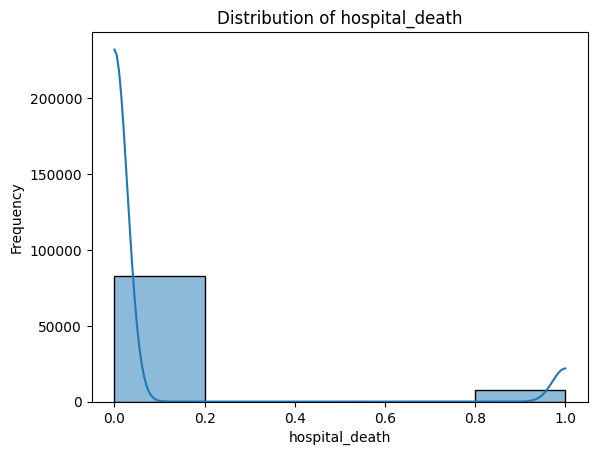

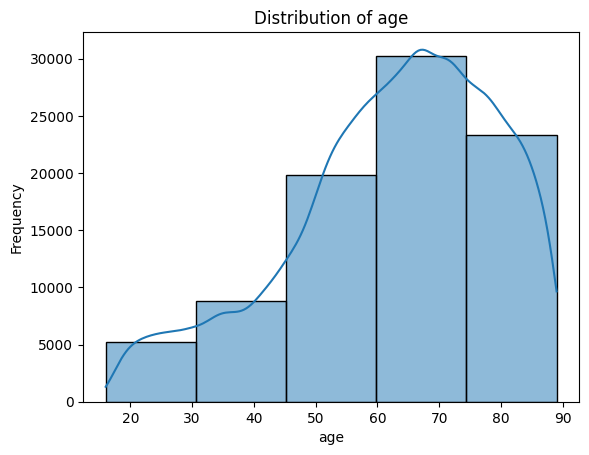

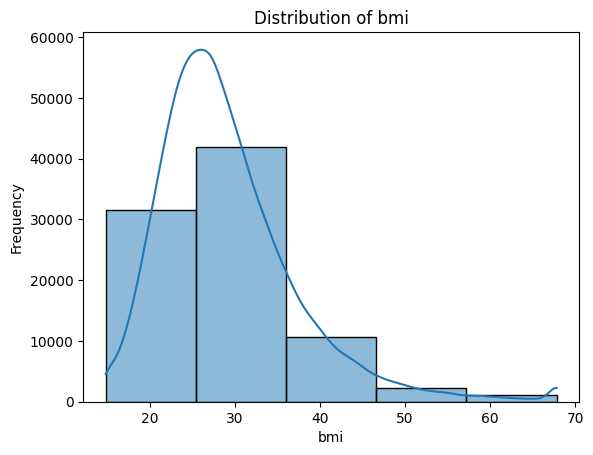

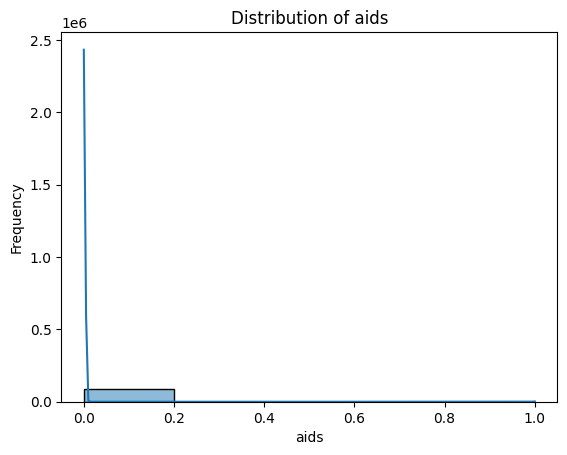

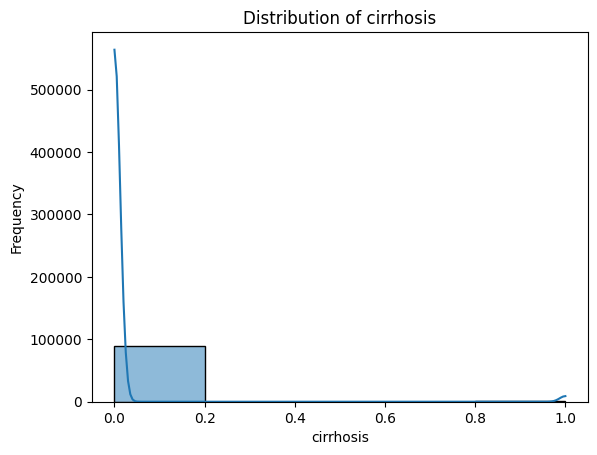

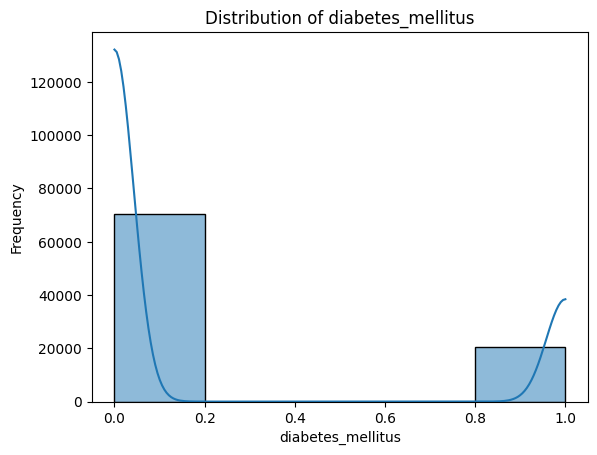

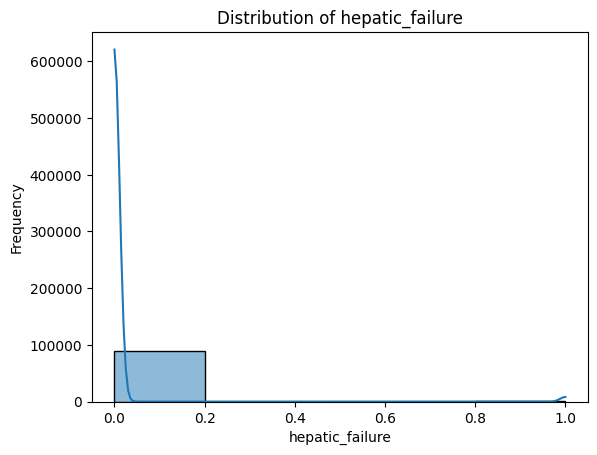

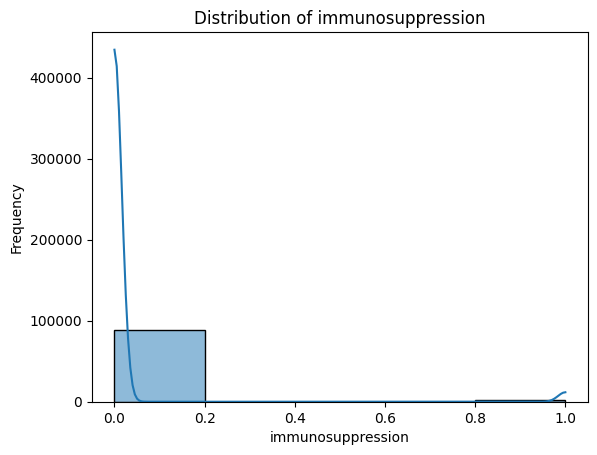

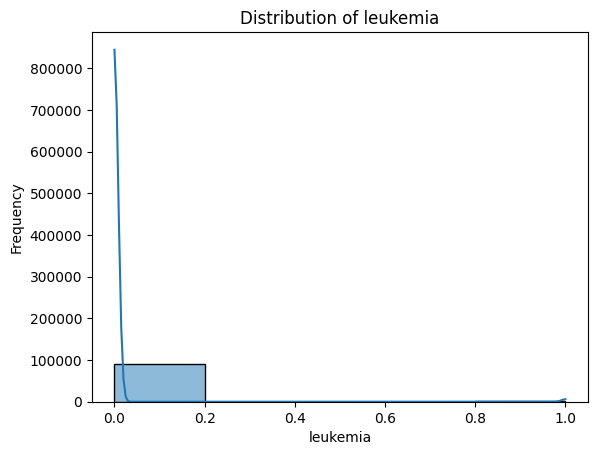

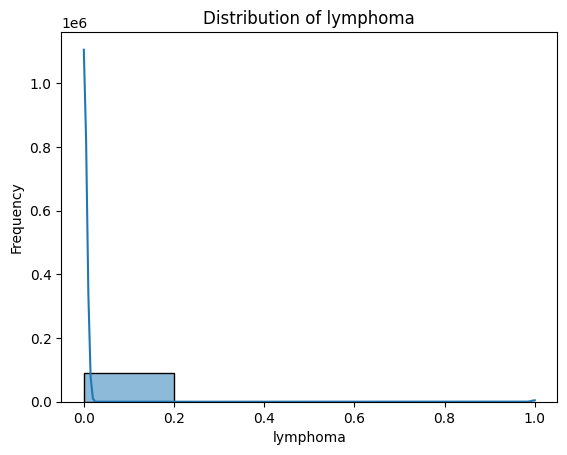

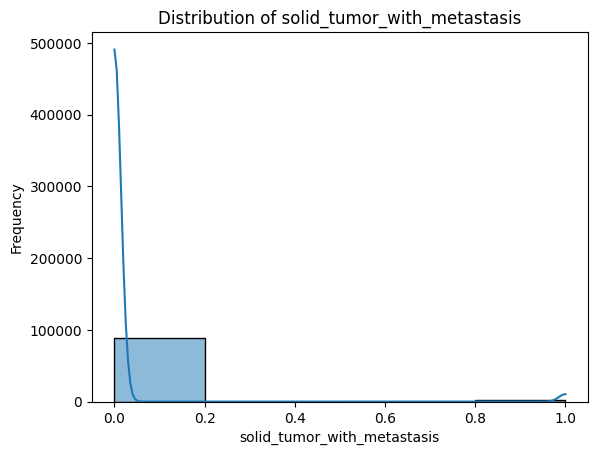

In [9]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
    sns.histplot(data[col], bins=5, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

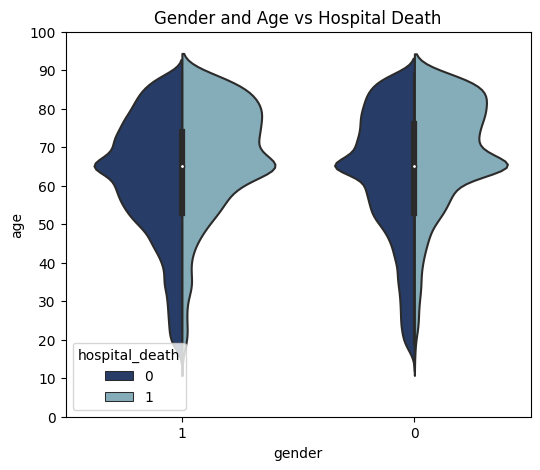

In [ ]:
plt.figure(figsize=(6, 5))
sns.violinplot(x="gender", y="age", hue="hospital_death", data=data, split=True, palette=['#1c3a73', '#7cb1c2'])
plt.title('Gender and Age vs Hospital Death')
plt.yticks(range(0, 110, 10))
plt.show()

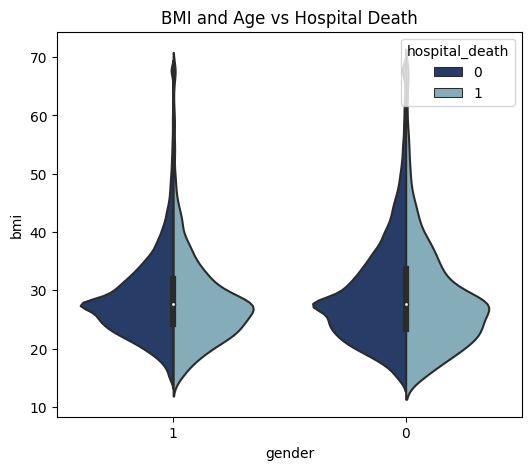

In [ ]:
plt.figure(figsize=(6, 5))
sns.violinplot(x="gender", y="bmi", hue="hospital_death", data=data, split=True, palette=['#1c3a73', '#7cb1c2'])
plt.title('BMI and Age vs Hospital Death')
plt.yticks(range(10, 80, 10))
plt.show()

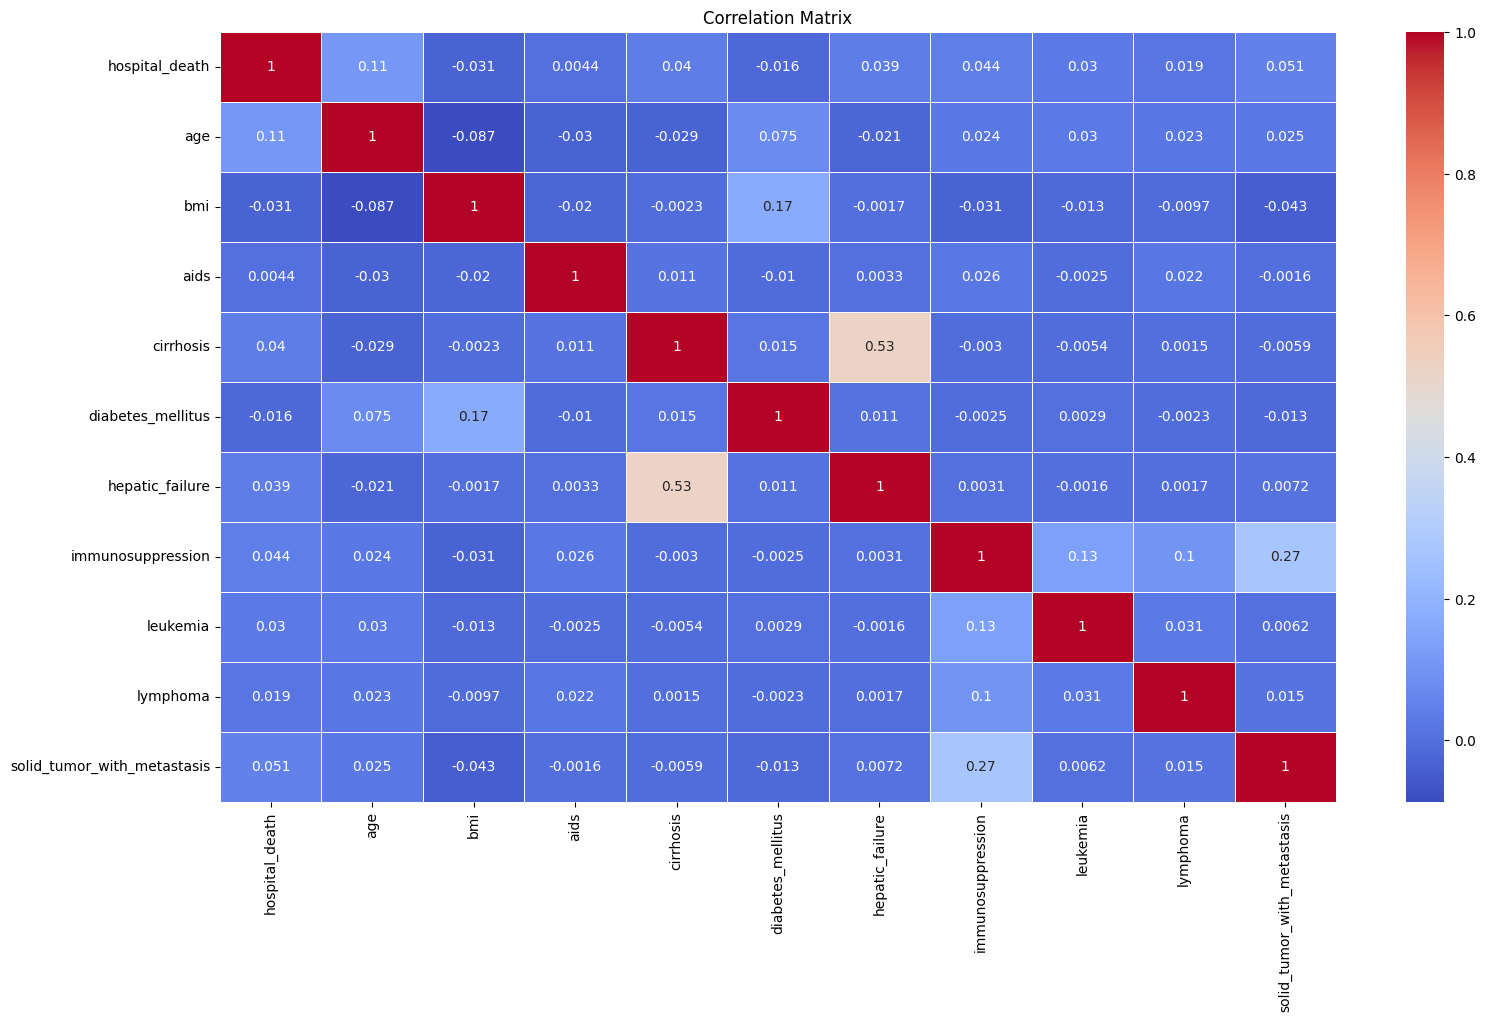

In [ ]:
correlations = data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Logistic Regression Models

###Basic Model w/o Considering Data Imbalance for Comparison

In [ ]:
#Preparing the data
# Split the data into features and target variable
X = data.drop('hospital_death', axis=1)
y = data['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Creating the logistic model and training it
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[24948     0]
 [ 2344     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     24948
           1       0.00      0.00      0.00      2344

    accuracy                           0.91     27292
   macro avg       0.46      0.50      0.48     27292
weighted avg       0.84      0.91      0.87     27292



###Model with a weight assigned to event of death

In [7]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

======== Training Set ==========
AUC :  0.5607897105621494
Accuracy :  0.9038017619070052
Confusion Matrix:
[[57333  5269]
 [  857   222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     62602
           1       0.04      0.21      0.07      1079

    accuracy                           0.90     63681
   macro avg       0.51      0.56      0.51     63681
weighted avg       0.97      0.90      0.93     63681

======== Validation Set ==========
AUC :  0.5419286762146304
Accuracy :  0.8999706873809175
Confusion Matrix:
[[12240  1166]
 [  199    41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     13406
           1       0.03      0.17      0.06       240

    accuracy                           0.90     13646
   macro avg       0.51      0.54      0.50     13646
weighted avg       0.97      0.90      0.93     13646

======== Test Set 

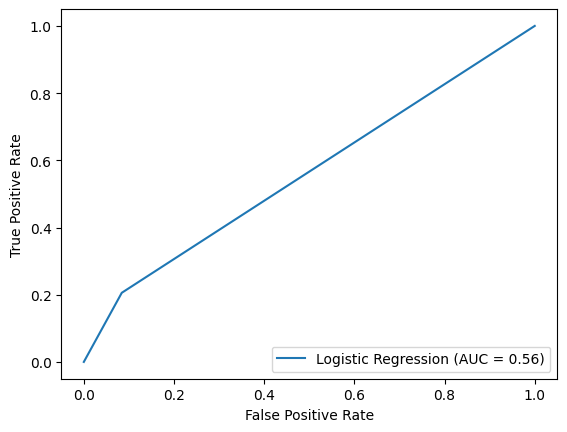

In [12]:
# Specify your features and target variable
X = data.drop(['hospital_death'], axis=1)
y = data['hospital_death']

# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.3, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

#Median imputation for age and bmi
X_train['age'].fillna(data['age'].median(), inplace=True)
X_train['bmi'].fillna(data['bmi'].median(), inplace=True)

X_valid['age'].fillna(data['age'].median(), inplace=True)
X_valid['bmi'].fillna(data['bmi'].median(), inplace=True)

X_test['age'].fillna(data['age'].median(), inplace=True)
X_test['bmi'].fillna(data['bmi'].median(), inplace=True)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Define a weight 'a' for class 0 and class 1 in the Logistic Regression model
a = 0.2

# Initialize and train a Logistic Regression model with class weights
model = LogisticRegression(class_weight={0: a, 1: 1-a})
model.fit(X_train, Y_train)

# Make predictions on the test and training sets
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
conf_matrix_valid, class_report_valid, auc_valid, acc_valid = get_scores(y_pred_valid, Y_valid)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_valid, class_report_valid, auc_valid, acc_valid)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, Y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

###Random Undersampler Model

======== Training Set ==========
AUC :  0.529798960156539
Accuracy :  0.5801416435043419
Confusion Matrix:
[[33601  2148]
 [24589  3343]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72     35749
           1       0.61      0.12      0.20     27932

    accuracy                           0.58     63681
   macro avg       0.59      0.53      0.46     63681
weighted avg       0.59      0.58      0.49     63681

======== Validation Set ==========
AUC :  0.532143681314572
Accuracy :  0.5793639161659094
Confusion Matrix:
[[7156  457]
 [5283  750]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.71      7613
           1       0.62      0.12      0.21      6033

    accuracy                           0.58     13646
   macro avg       0.60      0.53      0.46     13646
weighted avg       0.60      0.58      0.49     13646

======== Test Set ======

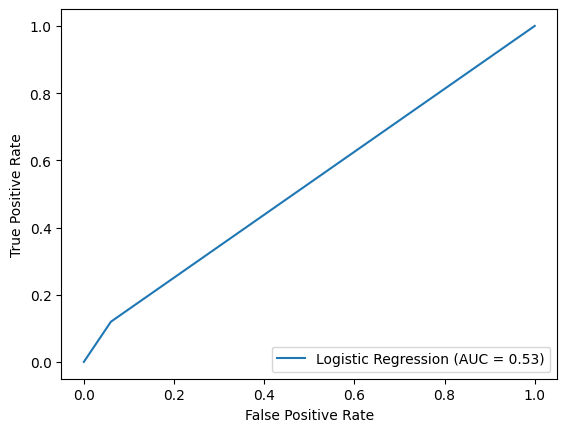

In [14]:
# Specify your features and target variable
X = data.drop(['hospital_death'], axis=1)
y = data['hospital_death']

# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.3, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

#Median imputation for age and bmi
X_train['age'].fillna(data['age'].median(), inplace=True)
X_train['bmi'].fillna(data['bmi'].median(), inplace=True)

X_valid['age'].fillna(data['age'].median(), inplace=True)
X_valid['bmi'].fillna(data['bmi'].median(), inplace=True)

X_test['age'].fillna(data['age'].median(), inplace=True)
X_test['bmi'].fillna(data['bmi'].median(), inplace=True)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Initialize RandomUnderSampler
rus = RandomUnderSampler()

# Apply random undersampling to the training set
X_resampled, Y_resampled = rus.fit_resample(X_train, Y_train)

# Initialize and train a Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_resampled, Y_resampled)

# Make predictions on the test and training sets
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
conf_matrix_valid, class_report_valid, auc_valid, acc_valid = get_scores(y_pred_valid, Y_valid)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the validation set
print('======== Validation Set ==========')
print_scores(conf_matrix_valid, class_report_valid, auc_valid, acc_valid)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, Y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()